In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

time_interval='minute'
asset=['TSLA']

In [8]:
for symbol in asset:
    df = pd.read_csv(f'./Data/{symbol}_{time_interval}_intraday_trading.csv')

In [9]:
df.columns = [col.strip() for col in df.columns]
df.columns = ['timestamp','open','high','low','close','volume']

df['volatility'] = df['high'] - df['low']
df['_hlMean'] =( df['high'] + df['low'])/2
df['vola_coeff'] = (df['volatility'] / df['_hlMean'])*100

df['day'] = [day[8:10] for day in df.timestamp]
df['month'] = [month[5:7] for month in df.timestamp]
df['year'] = [year[:4] for year in df.timestamp]
df['hour'] = [hour[-8:] for hour in df.timestamp]

time = df.timestamp

0.03457298430847771


In [10]:
rolling_mean_10 = df.vola_coeff.rolling(window=10).mean()
rolling_mean_20 = df.vola_coeff.rolling(window=20).mean()
rolling_mean_10 = rolling_mean_10.fillna(rolling_mean_10[9])
rolling_mean_20 = rolling_mean_20.fillna(rolling_mean_20[19])

In [11]:
vol_price_corr = df.corr()['volume']['high']
print(vol_price_corr)

0.14832734262305217


In [12]:
df.corr()

,open,high,low,close,volume,volatility,_hlMean,vola_coeff
open,1.000000,0.997733,0.997995,0.997179,0.100700,0.028163,0.998933,0.017772
high,0.997733,1.000000,0.995723,0.998392,0.148327,0.077214,0.998933,0.066841
low,0.997995,0.995723,1.000000,0.997717,0.071795,-0.015232,0.998927,-0.025622
close,0.997179,0.998392,0.997717,1.000000,0.117684,0.038289,0.999124,0.028005
volume,0.100700,0.148327,0.071795,0.117684,1.000000,0.830484,0.110234,0.827557
volatility,0.028163,0.077214,-0.015232,0.038289,0.830484,1.000000,0.031091,0.999855
_hlMean,0.998933,0.998933,0.998927,0.999124,0.110234,0.031091,1.000000,0.020698
vola_coeff,0.017772,0.066841,-0.025622,0.028005,0.827557,0.999855,0.020698,1.000000


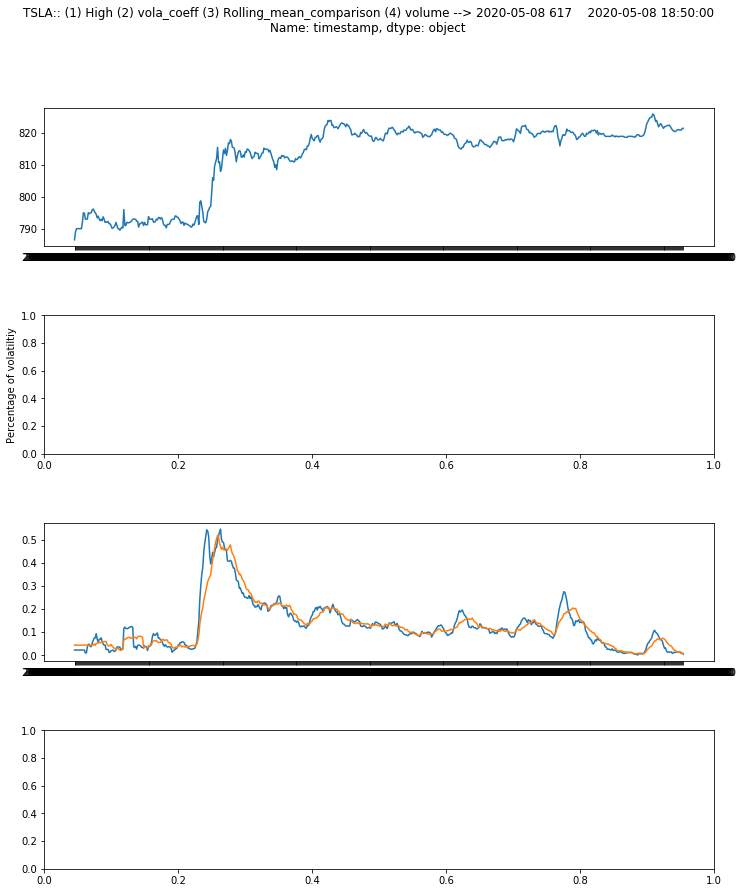

In [13]:
fig, axs = plt.subplots(4,figsize=(12,14))
fig.suptitle(f'TSLA:: (1) High (2) vola_coeff (3) Rolling_mean_comparison (4) volume --> {(time[0][:10])} {time[-1:][:10]}')
axs[0].plot(time, df.high)
fig.subplots_adjust(hspace = .5)
#axs[1].plot(time,df.vola_coeff)
#axs[1].set_ylabel('Percentage of volatiltiy')

axs[2].plot(time,rolling_mean_10,rolling_mean_20)
#axs[3].plot(time,df.volume)
#axs[3].set_xlabel(f'{df.day}')

